## Assignment - birth weight data

Birth weight is a situation where, while the data itself is actually fairly normal and symmetric, our main goal is actually *not* to model mean weight (via OLS), but rather to identify mothers at risk of having children below a certain "at-risk" threshold weight.

Quantile regression gives us just the tool we need. For the data we are using, see: http://people.reed.edu/~jones/141/BirthWgt.html

    bwt: baby's weight in ounces at birth
    gestation: duration of pregnancy in days
    parity: parity indicator (first born = 1, later birth = 0)
    age: mother's age in years
    height: mother's height in inches
    weight: mother's weight in pounds (during pregnancy)
    smoke: indicator for whether mother smokes (1=yes, 0=no) 
    
Use this data and `statsmodels` to fit a quantile regression, predicting `bwt` (birth weight) as a function of the other covariates. First, identify an appropriate `q` (quantile) to target a cutoff of 90 ounces - babies above that birth weight are generally healthy/safe, babies below are at-risk.

Then, fit and iterate your model. Be creative! You may want to engineer features. Hint - mother's age likely is not simply linear in its impact, and the other features may interact as well.

At the end, create at least *2* tables and *1* visualization to summarize your best model. Then (in writing) answer the following questions:

- What characteristics of a mother indicate the highest likelihood of an at-risk (low weight) baby?
- What can expectant mothers be told to help mitigate this risk?

Note that second question is not exactly a data science question - and that's okay! You're not expected to be a medical expert, but it is a good exercise to do a little bit of digging into a particular domain and offer informal but informed opinions.

In [2]:
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
bwt_df = pd.read_csv('http://people.reed.edu/~jones/141/Bwt.dat')
bwt_df.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,108,282,0,23,67,125,1
4,136,286,0,25,62,93,0


In [4]:
bwt_df.describe()


,bwt,gestation,parity,age,height,weight,smoke
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,119.462521,279.101363,0.262351,27.228279,64.049404,128.478705,0.390971
std,18.328671,16.010305,0.440100,5.817839,2.526102,20.734282,0.488176
min,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,108.000000,272.000000,0.000000,23.000000,62.000000,114.250000,0.000000
50%,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [5]:
# TODO - your work here! Also, add text cells for written questions.

In [6]:
bwt_df[bwt_df['bwt']<=90]['bwt'].count() / bwt_df["bwt"].count()


0.05792163543441227

In [7]:
bwt_df["weight"] = np.log(bwt_df["weight"])

In [8]:
#useless
# bwt_df["over41"] = bwt_df["age"].apply(lambda x : 1 if x >41 else 0 )
#bwt_df["over31"] = bwt_df["age"].apply(lambda x : 1 if x >=31 else 0 )
# #31 works when 30 does not. problem not understood.

In [9]:
# # useless
# bwt_df["under20"] = bwt_df["age"].apply(lambda x : 1 if x < 20 else 0 )
# bwt_df["under30"] = bwt_df["age"].apply(lambda x : 1 if x < 30 else 0 )
# bwt_df["below_2_std_height"] = bwt_df['height'].apply(lambda x : 1 if ( 
#     x -  np.mean(bwt_df["height"]) ) /  np.std(bwt_df["height"]) <=-2 else 0)
# bwt_df["abs_age_zscore"] = abs(( bwt_df["age"] -  np.mean(bwt_df["age"]) ) /  np.std(bwt_df["age"]))

In [10]:
bwt_df["abs_weight_zscore"] = abs(( bwt_df["weight"] -  np.mean(bwt_df["weight"]) ) /  np.std(bwt_df["weight"]))


In [11]:
bwt_df["age_parity"] = bwt_df["age"] * bwt_df["parity"]

In [12]:
quant_formula = 'bwt ~ ' + ' + '.join(bwt_df.drop(['bwt',"weight","age"], axis='columns').columns)
quant_mod = smf.quantreg(quant_formula, data=bwt_df)
quant_reg = quant_mod.fit(q=.06)
quant_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                    bwt   Pseudo R-squared:               0.2091
Model:                       QuantReg   Bandwidth:                       6.248
Method:                 Least Squares   Sparsity:                        105.8
Date:                Thu, 24 Jan 2019   No. Observations:                 1174
Time:                        21:38:20   Df Residuals:                     1167
                                        Df Model:                            6
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -55.3872     26.667     -2.077      0.038    -107.708      -3.066
gestation             0.4646      0.077      6.038      0.000       0.314       0.616
parity                8.1224      7.022      1.157      0.248      -5.655      21.900
height                0.4711      0.288      1.637      0.102      -0.094       1.036
smoke                -9.4018      1.542     -6.096      0.000     -12.428      -6.376
abs_weight_zscore    -6.0207      1.063     -5.661      0.000      -8.107      -3.934
age_parity           -0.4529      0.289     -1.570      0.117      -1.019       0.113
=====================================================================================

The condition number is large, 8.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

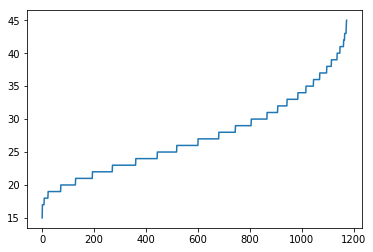

In [13]:
plt.plot(bwt_df["age"].sort_values().values)

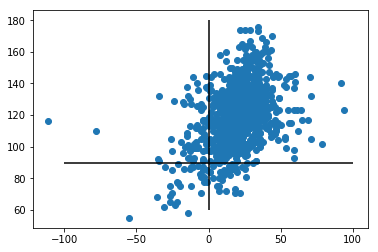

In [14]:
plt.scatter(bwt_df["gestation"]-259,bwt_df["bwt"])
plt.hlines(90,-100,100)
plt.vlines(0,60,180)


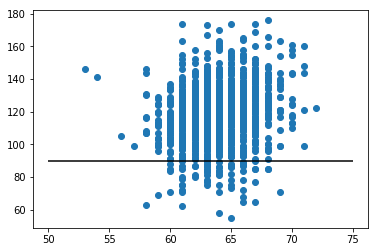

In [15]:
plt.scatter(bwt_df["height"],bwt_df["bwt"])
plt.hlines(90,50,75)


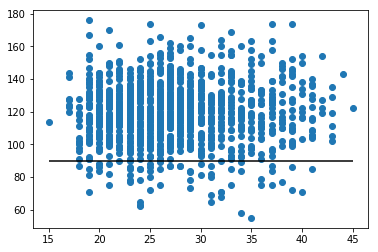

In [16]:
plt.scatter(bwt_df["age"],bwt_df["bwt"])
plt.hlines(90,15,45)

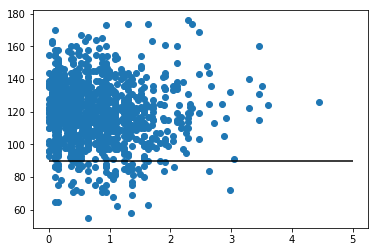

In [17]:
plt.scatter(bwt_df["abs_weight_zscore"],bwt_df["bwt"])
plt.hlines(90,0,5)

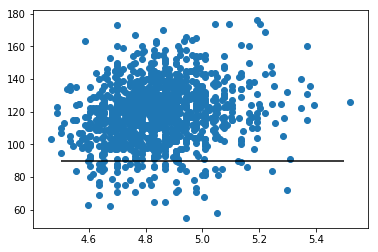

In [18]:
plt.scatter(bwt_df["weight"],bwt_df["bwt"])
plt.hlines(90,4.5,5.5)


In [19]:
quant_formula = 'bwt ~ gestation + abs_weight_zscore + smoke' 
quant_mod = smf.quantreg(quant_formula, data=bwt_df)
quant_reg = quant_mod.fit(q=.06)
quant_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                    bwt   Pseudo R-squared:               0.1987
Model:                       QuantReg   Bandwidth:                       6.284
Method:                 Least Squares   Sparsity:                        113.3
Date:                Thu, 24 Jan 2019   No. Observations:                 1174
Time:                        21:38:21   Df Residuals:                     1170
                                        Df Model:                            3
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -29.9314     22.788     -1.313      0.189     -74.641      14.778
gestation             0.4743      0.081      5.834      0.000       0.315       0.634
abs_weight_zscore    -5.4209      1.215     -4.462      0.000      -7.804      -3.037
smoke                -8.0900      1.657     -4.882      0.000     -11.341      -4.839
=====================================================================================

The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
quant_mod = smf.quantreg(quant_formula, data=bwt_df)
quant_reg96 = quant_mod.fit(q=.96)
quant_reg96.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                    bwt   Pseudo R-squared:              0.09156
Model:                       QuantReg   Bandwidth:                       6.762
Method:                 Least Squares   Sparsity:                        193.0
Date:                Thu, 24 Jan 2019   No. Observations:                 1174
Time:                        21:50:47   Df Residuals:                     1170
                                        Df Model:                            3
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            33.8010     34.279      0.986      0.324     -33.455     101.057
gestation             0.4142      0.121      3.431      0.001       0.177       0.651
abs_weight_zscore     4.0448      2.108      1.919      0.055      -0.090       8.180
smoke                -6.7792      2.371     -2.859      0.004     -11.432      -2.127
=====================================================================================

The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

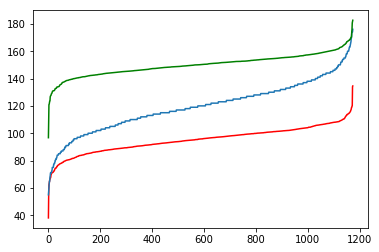

In [51]:
l = pd.Series(quant_reg.predict())
l = l.sort_values()
plt.plot(l.values, color= 'r')
l2 = pd.Series(quant_reg96.predict()).sort_values().values
plt.plot(bwt_df["bwt"].sort_values().values)
plt.plot(l2,color='g')

## Observations
- after adding the weight_zscore feature, t statistic of age factors dropped below 1. Previously they had t-statistics indicating significance and larger coefficients

## Recommendations
- Stop Smoking
- Get your weight closer to the average weight. More deviations from the average generally decreases weight. If you are under weight, gain some weight. If you are over weight, try to lose some weight.